<a href="https://colab.research.google.com/github/SSUMINIs/mulcam34/blob/main/plotly_240109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly
plotly.__version__

'5.18.0'

In [ ]:
import plotly.io as pio
pio.renderers
#pio.renderers.default = 'jupyterlab' #만약 안나올경우

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

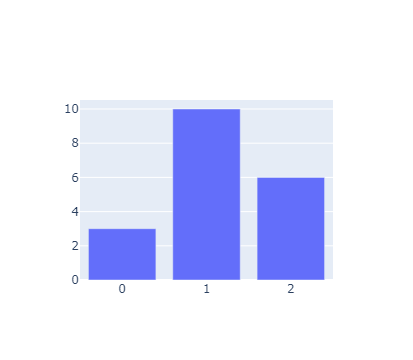

In [ ]:
import plotly.graph_objects as go

# 데이터 불러오기
y = [3,10,6]
fig = go.Figure(
    data = [go.Bar(y=y)]
)
fig.show()

In [ ]:
## 파일 목록 확인
import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\kaggle-survey-2019\multiple_choice_responses.csv
./kaggle/input\kaggle-survey-2019\other_text_responses.csv
./kaggle/input\kaggle-survey-2019\questions_only.csv
./kaggle/input\kaggle-survey-2019\survey_schema.csv
./kaggle/input\kaggle-survey-2020\kaggle_survey_2020_responses.csv
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_answer_choices.pdf
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_methodology.pdf
./kaggle/input\kaggle-survey-2021\kaggle_survey_2021_responses.csv
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_answer_choices.pdf
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_methodology.pdf


In [ ]:
## 데이터 불러오기
#2021년 설문조사 데이터
import pandas as pd
import numpy as np
df = pd.read_csv("./kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_2408\1880431120.py:5: DtypeWarning:

Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.



,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
questions = df.iloc[0,:].T
questions

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [ ]:
df = df.iloc[1:,:].reset_index(drop=True)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Q25'].value_counts() #그룹화 필요 _replace

Q25
$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: count, dtype: int64

In [ ]:
temp = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})

temp

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [ ]:
## express 방식
- 막대 그래프 그리기

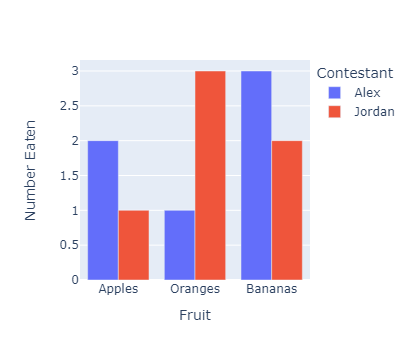

In [ ]:
import plotly.express as px

fig = px.bar(temp, x = 'Fruit', y='Number Eaten', color ='Contestant',barmode = 'group') #barmode
fig.show()

In [ ]:
long_df = px.data.medals_long() #샘플데이터
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


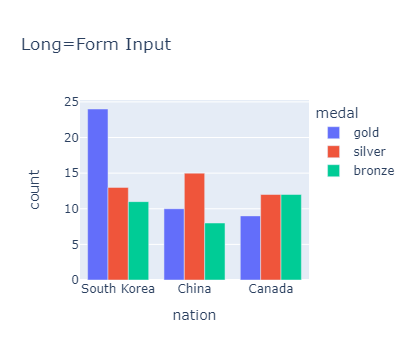

In [ ]:
fig = px.bar(long_df, x = 'nation', y='count',color ='medal',barmode='group',title='Long=Form Input') #barmode
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show('json')

In [ ]:
## 응답자의 연령대 시각화
q1_df = df['Q1'].value_counts()

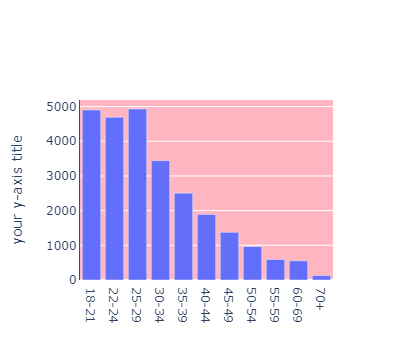

In [ ]:
## Q1 막대그래프
#- 위 결과값을 q1_df로 저장
CATEGORY_ORDER = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]

fig = go.Figure()
fig.add_trace(go.Bar(x = q1_df.index, y = q1_df.values))
# 시각화 스타일 변경
fig.update_layout(xaxis = dict(categoryorder ='array', categoryarray = CATEGORY_ORDER),
                  yaxis = dict(title ='your y-axis title', linecolor='red'),
                  plot_bgcolor='lightpink')
fig.show()

In [ ]:
df['Q2'].value_counts()

Q2
Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: count, dtype: int64

In [ ]:
q1_q2_df = df.loc[:, ["Q1", "Q2"]].replace({'Prefer not to say':'etc', 'Nonbinary':"etc", "Prefer to self-describe": "etc"})
q1_q2_df['Q2'].value_counts()

Q2
Man      20598
Woman     4890
etc        485
Name: count, dtype: int64

In [ ]:
q1_q2_df = q1_q2_df.groupby(['Q2','Q1']).size().reset_index().rename(columns = {0:"Count"})
q1_q2_df.head()

,Q2,Q1,Count
0,Man,18-21,3696
1,Man,22-24,3643
2,Man,25-29,3859
3,Man,30-34,2765
4,Man,35-39,1993


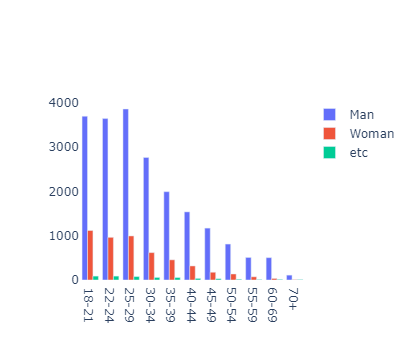

In [ ]:
fig = go.Figure()
for gender, group in q1_q2_df.groupby("Q2"):
    #print(gender,group)
    fig.add_trace(go.Bar(x = group['Q1'], y = group['Count'],name = gender))
fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [ ]:
q3_df = df['Q3'].value_counts()
q3_df

Q3
India                       7434
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Kazakhstan                    45
Norway                        45
Algeria                       44
Ethiopia                      43
Iraq                          43
Name: count, Length: 66, dtype: int64

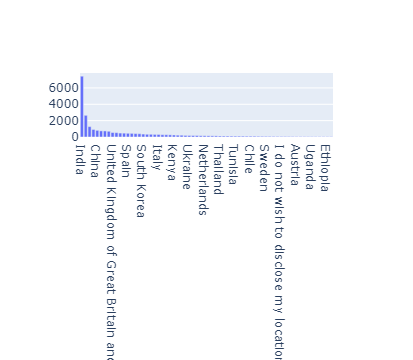

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = q3_df.index, y = q3_df.values))
fig.show()

In [ ]:
q3_q25 = df.loc[:,['Q3','Q25']]
q3_q25.head()

,Q3,Q25
0,India,"25,000-29,999"
1,Indonesia,"60,000-69,999"
2,Pakistan,$0-999
3,Mexico,"30,000-39,999"
4,India,"30,000-39,999"


In [ ]:
q3_q25['Q25'].value_counts()
#q3_q25['Q25'] = q3_q25['Q25'].replace({'$0-999':'$0-1,999', '1,000-1,999':'$0-1,999'
                                     #,'2,000-2,999':'$2,000-3,999','3,000-3,999':'$2,000-3,999'})
q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['2,000-2,999', '3,000-3,999'], '$2,000-3,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['4,000-4,999', '5,000-7,499'], '$4,000-7,499')
q3_q25['Q25'] = q3_q25['Q25'].replace(['25,000-29,999', '60,000-69,999',
                       '30,000-39,999','15,000-19,999', '70,000-79,999',
                       '10,000-14,999', '20,000-24,999', '7,500-9,999',
                       '100,000-124,999', '40,000-49,999', '50,000-59,999',
                       '300,000-499,999', '200,000-249,999', '125,000-149,999',
                       '250,000-299,999', '80,000-89,999', '90,000-99,999',
                       '150,000-199,999', '>$1,000,000', '$500,000-999,999'], '$7,500+')

q3_q25['Q25'].value_counts()

Q25
$7,500+         8943
$0-1,999        4338
$4,000-7,499    1155
$2,000-3,999     955
Name: count, dtype: int64

In [ ]:
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      25973 non-null  object
 1   Q25     15391 non-null  object
dtypes: object(2)
memory usage: 406.0+ KB


In [ ]:
q3_q25 = q3_q25.dropna(subset = ['Q25']) #결측치 삭제
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15391 entries, 0 to 25972
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      15391 non-null  object
 1   Q25     15391 non-null  object
dtypes: object(2)
memory usage: 360.7+ KB


In [ ]:
q3_q25 = q3_q25.groupby(['Q3','Q25']).size().reset_index().rename(columns = {0:"Count"})
q3_q25

,Q3,Q25,Count
0,Algeria,"$0-1,999",14
1,Algeria,"$2,000-3,999",1
2,Algeria,"$4,000-7,499",3
3,Algeria,"$7,500+",5
4,Argentina,"$0-1,999",34
...,...,...,...
254,United States of America,"$7,500+",1669
255,Viet Nam,"$0-1,999",86
256,Viet Nam,"$2,000-3,999",15
257,Viet Nam,"$4,000-7,499",15


In [ ]:
india_df = q3_q25.loc[q3_q25['Q3']=='India'].reset_index(drop=True)
usa_df = q3_q25.loc[q3_q25['Q3']=='United States of America'].reset_index(drop=True)
display(india_df)
display(usa_df)

,Q3,Q25,Count
0,India,"$0-1,999",1214
1,India,"$2,000-3,999",239
2,India,"$4,000-7,499",451
3,India,"$7,500+",1472


,Q3,Q25,Count
0,United States of America,"$0-1,999",140
1,United States of America,"$2,000-3,999",19
2,United States of America,"$4,000-7,499",17
3,United States of America,"$7,500+",1669


In [ ]:
india_df['Percentage']=india_df['Count']/india_df['Count'].sum()
india_df['%'] = np.round(india_df['Percentage']*100,1)
usa_df['Percentage']=usa_df['Count']/usa_df['Count'].agg('sum')
usa_df['%'] = np.round(usa_df['Percentage']*100,1)
display(india_df)
display(usa_df)

,Q3,Q25,Count,Percentage,%
0,India,"$0-1,999",1214,0.359597,36.0
1,India,"$2,000-3,999",239,0.070794,7.1
2,India,"$4,000-7,499",451,0.133590,13.4
3,India,"$7,500+",1472,0.436019,43.6


,Q3,Q25,Count,Percentage,%
0,United States of America,"$0-1,999",140,0.075881,7.6
1,United States of America,"$2,000-3,999",19,0.010298,1.0
2,United States of America,"$4,000-7,499",17,0.009214,0.9
3,United States of America,"$7,500+",1669,0.904607,90.5


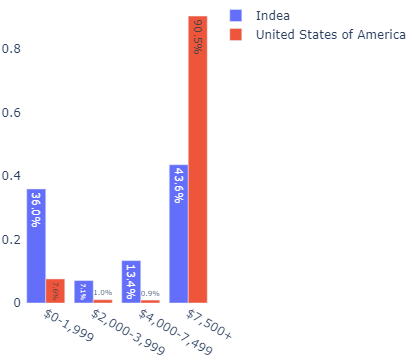

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name = "Indea", x = india_df['Q25'], y = india_df['Percentage'], text = india_df['%'].astype(str) + "%",textposition='auto'))
fig.add_trace(go.Bar(name = "United States of America", x = usa_df['Q25'], y = usa_df['Percentage'], text = usa_df['%'].astype(str) + "%",textposition='auto'))
fig.update_layout(plot_bgcolor = 'white',margin=dict(l=20,r=50,b=10,t=1))
#fig 사이즈 변경 참고 : https://plotly.com/python/setting-graph-size/

fig.show()

,Q3,Q25,Count,Percentage,%
0,India,"$0-1,999",1214,0.359597,36.0
1,India,"$2,000-3,999",239,0.070794,7.1
2,India,"$4,000-7,499",451,0.133590,13.4
3,India,"$7,500+",1472,0.436019,43.6
4,United States of America,"$0-1,999",140,0.075881,7.6
5,United States of America,"$2,000-3,999",19,0.010298,1.0
6,United States of America,"$4,000-7,499",17,0.009214,0.9
7,United States of America,"$7,500+",1669,0.904607,90.5


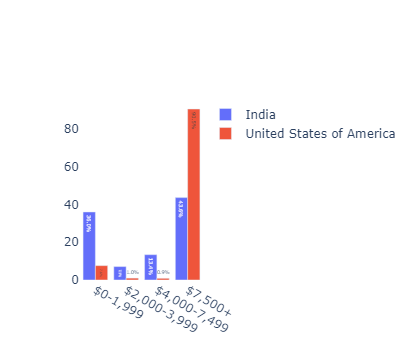

In [ ]:
india_usa_df = pd.concat([india_df, usa_df]).reset_index(drop=True)
display(india_usa_df)
fig = go.Figure()
for country, group in india_usa_df.groupby("Q3"):
   fig.add_trace(go.Bar(x = group['Q25'],
                        y = group['%'],
                        name = country,
                        text = group['%'].astype(str) + "%",
                        textposition='auto'))
fig.update_layout(barmode="group",
                  plot_bgcolor = "white")
fig.show()